# Motor Vehicle Accidents in the USA - Severity of accident analysis
## Author: Emet Flores - [LinkedIn](https://www.linkedin.com/in/emeterio-flores-1a240626)
## Review of NHTSA Data Sets

Building upon the shoulders of a robust field of study, regarding motor vehicle accidents and their consequences, the following exercise reviews available data from the U.S. Department of Transportation NHTSA (National Highway Traffic Safety Administration), applying  a reduced set of ML tools.

The objective is to gather insights, and consider if the observations them merit further analysis in order to understand the severity of accident and mitigating ideas.

This workbook explores the data for a specific data set:

* **Accident**: This data file contains information about crash characteristics andenvironmental conditions at the time of the crash. There is one record per crash.

## This notebook contains:
* Import of preprocessed ACCIDENT data set.
* Exploratory review of data and vizualisation
* Preliminary models

## Important notes on ACCIDENT data set fields codification:
Note - Unknown codifications = "--"

|FIELD|CODE|DESCRIPTION|
|:---:|:---:|:---|
| REGION | 1 | Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT) |
| | 2 | Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, IA, MO, KS) |
| | 3 | South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA, FL, AL, MS, LA, AR, OK, TX) |
| | 4 | West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, WY, AK, HI) |
| URBANICITY | 1-2 | 1 Urban, 2 Rural |
| PJ | 46-4060 | CRSS Police Jurisdiction Number |
| PEDS | 0-99 | Number of Persons Not in Motor Vehicles |
| PERMVIT | 0-999 | Number of Persons in Motor Vehicles In-Transport |
| DAY_WEEK | 1-9 | 1 Sunday - 7 Saturday, 9 Unknown |
| INT_HWY | 0-9 | Interstate Highway 0=No 1 =Yes, 9 Unknown|
   

## More ACCIDENT fields and codification relevant to the scope
**Codes for year 2018 data**

|FIELD|CODE|DESCRIPTION                                              | CODE | DESCRIPTION |
|:---:|:---:|:---                                                    | :---:|:---|
| **HARM_EV** | | **NON-COLLISION HARMFUL EVENTS**                   |    | **COLLISION WITH OBJECT NOT FIXED** |
| |  1 | Rollover/Overturn                                           | 8  | Pedestrian |
| |  2 | Fire/Explosion                                              | 9  | Pedalcyclist |
| |  3 | Immersion or Partial Immersion                              | 10 | Railway Vehicle |
| |  4 | Gas Inhalation                                              | 11 | Live Animal |
| |  5 | Fell/Jumped from Vehicle                                    | 14 | Parked Motor Vehicle |
| |  6 | Injured in Vehicle (Non-Collision)                          | 15 | Non-Motorist on Personal Conveyance |
| |  7 | Other Noncollision                                          | 18 | Other Object Not Fixed  |
| | 16 | Thrown or Falling Object                                    | 45 | Working Motor Vehicle |
| | 44 | Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)| 49 | Ridden Animal or Animal Drawn Conveyance |
| | 51 | Jackknife (Harmful to This Vehicle)                         | 73 | Object That Had Fallen From Motor Vehicle In-Transport |
| | 72 | Cargo/Equipment Loss, Shift, or Damage (Harmful)            | 74 | Road Vehicle on Rails |
| |    |                                                             | 91 | Unknown Object Not Fixed |
| |    |                                                             | |  |
| |    | **COLLISION WITH MOTOR VEHICLE IN TRANSPORT**               | |  |
| | 12 | Motor Vehicle In-Transport                                  | |  |                                                           
| | 54 | MV In-Transport Strkes/Strck by Cargo, Prsns or Objts...    | |  |                                                           
| | 55 | Motor Vehicle in Motion Outside the Trafficway              | |  |                                                           
| |    |                                                             | |  |
| |    | **COLLISION WITH FIXED OBJECT**                             |    | **COLLISION WITH FIXED OBJECT** |                           
| | 17 | Boulder                                                     | 40 | Fire Hydrant |
| | 19 | Building                                                    | 41 |Shrubbery |
| | 20 | Impact Attenuator/Crash Cushion                             | 42 | Tree (Standing Only) |
| | 21 | Bridge Pier or Support                                      | 43 | Other Fixed Object |
| | 23 | Bridge Rail (Includes Parapet)                              | 46 | Traffic Signal Support |
| | 24 | Guardrail Face                                              | 48 | Snow Bank |
| | 25 | Concrete Traffic Barrier                                    | 50 | Bridge Overhead Structure |
| | 26 | Other Traffic Barrier                                       | 52 | Guardrail End |
| | 30 | Utility Pole/Light Support                                  | 53 | Mail Box |
| | 31 | Post, Pole or Other Support                                 | 57 | Cable Barrier |
| | 32 | Culvert                                                     | 58 | Ground |
| | 33 | Curb                                                        | 59 | Traffic Sign Support |
| | 34 | Ditch                                                       | 93 | Unknown Fixed Object |
| | 35 | Embankment                                                  | 99 | Reported as Unknown |
| | 38 | Fence                                                       | |  |
| | 39 | Wall                                                        | |  |
| |    |                                                             | |  |
| **MAN_COLL** |  | **MANNER OF COLLISION**                          | |  |
| |  0 | Not Collision with Motor Vehicle in Transport               |  9 | Rear-to-Side |
| |  1 | Front-to-Rear                                               | 10 | Rear-to-Rear |
| |  2 | Front-to-Front                                              | 11 | Other |
| |  6 | Angle                                                       | 98 | Not Reported |
| |  7 | Sideswipe, Same Direction                                   | 99 | Reported as Unknown|
| |  8 | Sideswipe, Opposite Direction                               | |  |
| |    |                                                             | |  |
| **REL_ROAD** |  | **RELATION TO TRAFFICWAY**                       | |  |
| |  1 | On Roadway                                                  |  7 | In Parking Lane/Zone |
| |  2 | On Shoulder                                                 |  8 | Gore |
| |  3 | On Median                                                   | 10 | Separator |
| |  4 | On Roadside                                                 | 11 | Continuous Left Turn Lane |
| |  5 | Outside Trafficway                                          | 98 | Not Reported |
| |  6 | Off Roadway – Location Unknown                              | 99 | Reported as Unknown |
| |    |                                                             | |  |
| **LGT_COND** |  | **LIGHT CONDITION**                              | |  |
| |  1 | Daylight                                                    |  6 | Dark – Unknown Lighting |
| |  2 | Dark – Not Lighted                                          |  7 | Other |
| |  3 | Dark – Lighted                                              |  8 | Not Reported |
| |  4 | Dawn                                                        |  9 | Reported as Unknown |
| |  5 | Dusk                                                        | |  |
| |    |                                                             | |  |
| **WEATHER** |  | **ATMOSPHERIC CONDITIONS**                        | |  |
| |  0 | No Additional Atmospheric Conditions                        |  7 | Blowing Sand, Soil, Dirt |
| |  1 | Clear                                                       |  8 | Other |
| |  2 | Rain                                                        | 10 | Cloudy |
| |  3 | Sleet or Hail                                               | 11 | Blowing Snow |
| |  4 | Snow                                                        | 12 | Freezing Rain or Drizzle |
| |  5 | Fog, Smog, Smoke                                            | 98 | Not Reported |
| |  6 | Severe Crosswinds                                           | 99 | Reported as Unknown |
| |    |                                                             | |  |
| **ALCOHOL** |  | **ALCOHOL INVOLVED IN CRASH**                     | |  |
| |  1 | Alcohol Involved                                            | 8 | No Applicable Person |
| |  2 | No Alcohol Involved                                         | 9 | Unknown |


## Important notes on ACCIDENT data set fields, **TARGET Variable**:
This field will provide our **TARGET** variable information. Its also ordered in the severity defined by the NHTSA. For the scope of the project, we will only use the most sever clasification (4 = Fatal).

|FIELD|CODE|DESCRIPTION|
|:---:|:---:|:---|
| **MAX_SEV** |  | **Maximum Injury Severity in Crash** |
| |  4 | Fatal |
| |  3 | Suspected Serious Injury  |
| |  2 | Suspected Minor Injury  |
| |  1 | Possible Injury  |
| |  5 | Injured, Unknown Severity  |
| |  0 | No Apparent Injury |
| |  6 | Died Prior  |
| |  9 | Unknown/Not Reported  |
| |  8 | No Person Involved in Crash |

# Exploratory review of ACCIDENT data set
* Import file
* Quick overview of data set
* Explore data with more data visualization
* Review correlations
* Run preliminary models

In [2]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the ACCIDENT data
df_acc = pd.read_csv ('01_1_ACC_Short.csv', sep = ',')

In [4]:
# Quick review of columns
df_acc.head()

,Unnamed: 0,CASENUM,REGION,PJ,URBANICITY,VE_TOTAL,VE_FORMS,PEDS,PERMVIT,MONTH,...,HARM_EV,ALCOHOL,MAX_SEV,MAN_COLL,REL_ROAD,LGT_COND,WEATHER,INT_HWY,PSUSTRAT,WEIGHT
0,0,201800381338,4,208,1,4,4,0,4,1,...,12,2,0,1,1,1,1,1,20,187.193308
1,1,201800381366,4,214,1,3,3,0,3,1,...,12,2,1,1,1,1,1,0,20,149.787336
2,2,201800381374,4,214,1,2,2,0,3,1,...,12,2,1,7,3,2,1,1,20,76.421258
3,3,201800383118,4,209,1,2,2,0,2,1,...,12,9,0,6,1,1,10,0,20,265.232273
4,4,201800383942,4,306,1,2,2,0,3,1,...,12,2,1,7,1,1,10,1,23,78.134540


In [5]:
# Remove index column
df_acc.drop(['Unnamed: 0','CASENUM','PJ','YEAR','MINUTE','PSUSTRAT','WEIGHT'],axis=1, inplace=True)

In [6]:
# Quick review of shape of the data set
df_acc.shape

(48443, 17)

In [7]:
# Quick review of columns
df_acc.columns

Index(['REGION', 'URBANICITY', 'VE_TOTAL', 'VE_FORMS', 'PEDS', 'PERMVIT',
       'MONTH', 'DAY_WEEK', 'HOUR', 'HARM_EV', 'ALCOHOL', 'MAX_SEV',
       'MAN_COLL', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'],
      dtype='object')

In [8]:
# Quick review of TARGET variable columns
df_acc[['MAX_SEV']].head()

,MAX_SEV
0,0
1,1
2,1
3,0
4,1


In [9]:
# And extract it for further later use
df_target = df_acc[['MAX_SEV']].copy()

In [10]:
df_target['MAX_SEV'].value_counts()

0    24354
1    10564
2     6861
3     4816
4      873
9      738
5      218
8       17
6        2
Name: MAX_SEV, dtype: int64

# Review ACCIDENT data with visualization tools
* Review ocurrence and value distribution - Historgrams
* Quick review of outlier values - Boxplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEB895C208>,
      dtype=object)

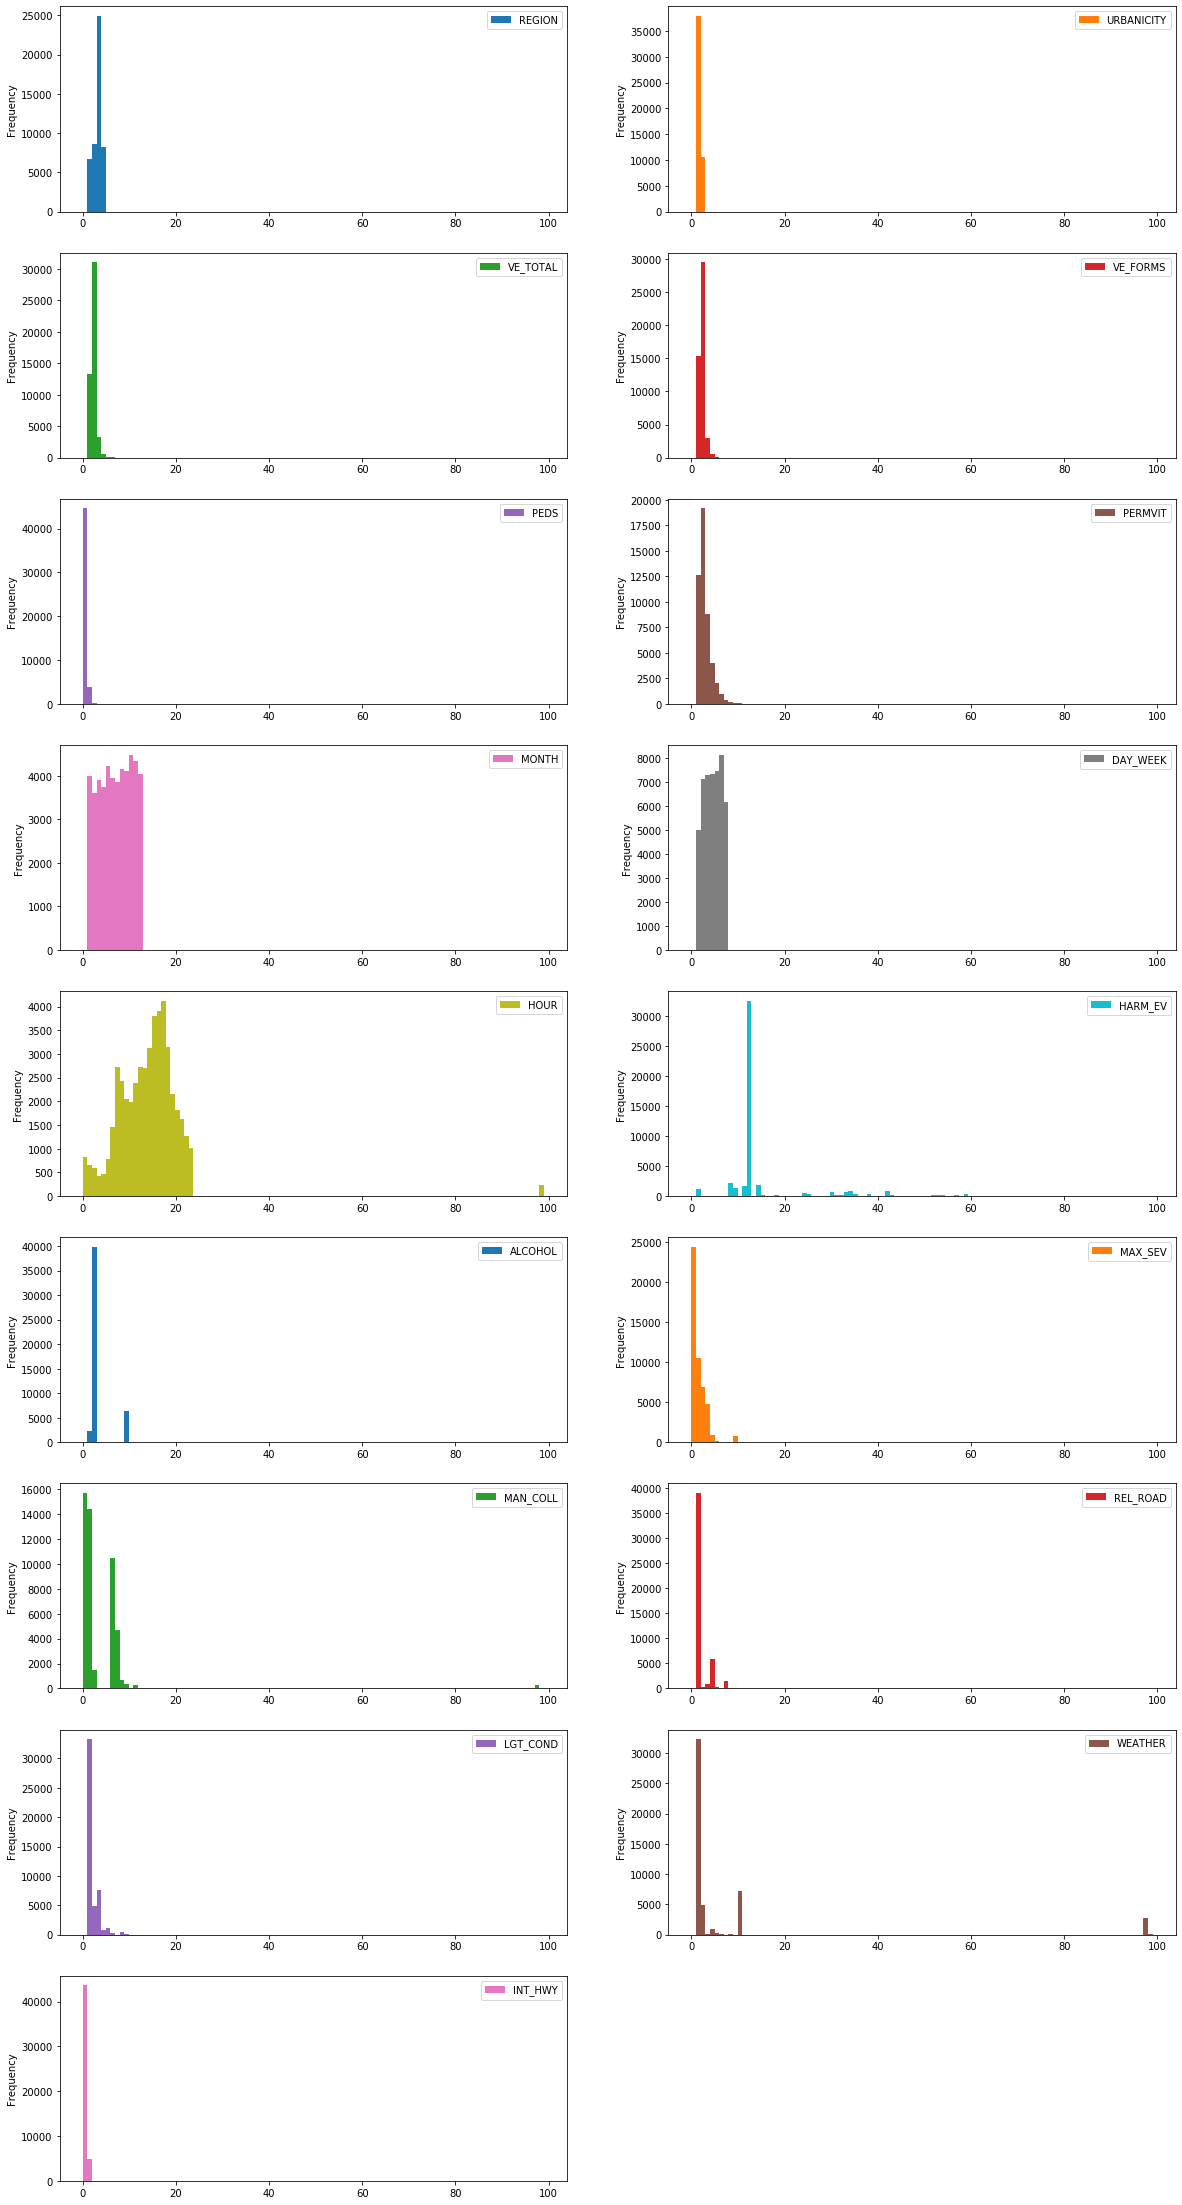

In [201]:
# A quick review of the docurrence and value distribution 
df_acc.plot.hist(subplots=True, layout=(9, 2), bins = 100, figsize=(20, 40), sharex=False)


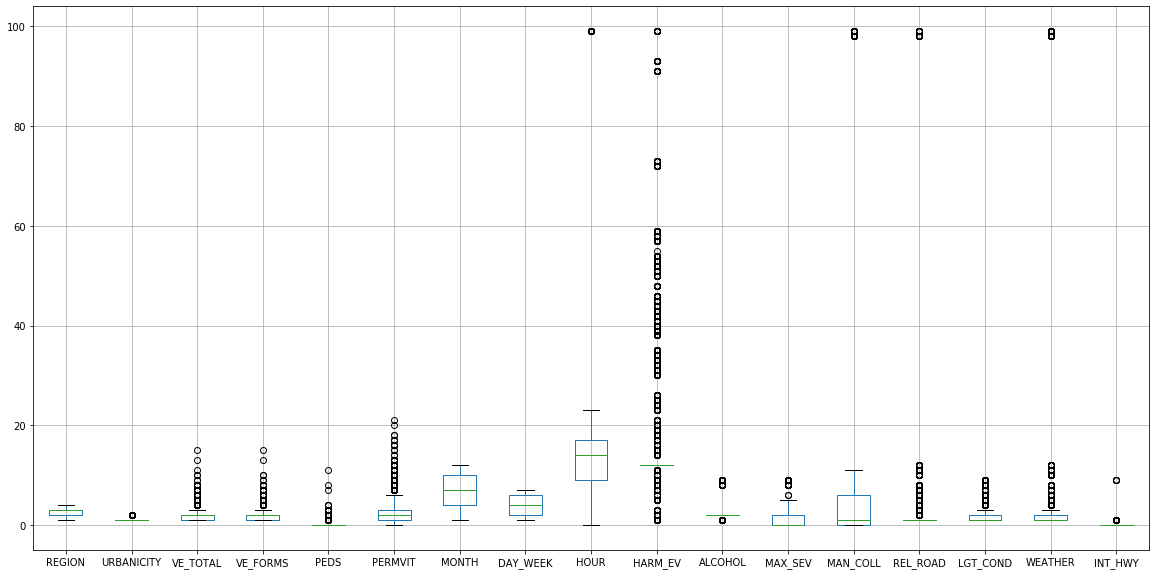

In [191]:
# Quick review of outlier values - Boxplots
df_acc.boxplot(figsize=(20, 10))

# Review correlations of the data


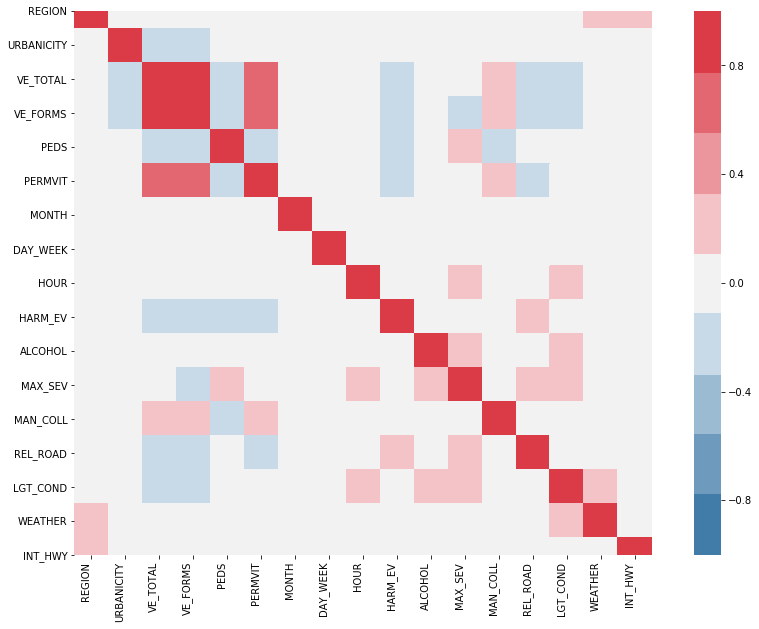

In [192]:
# Review general correlations with a quick heatmap
plt.subplots(figsize=(15,10))
correlation = df_acc.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [193]:
# And review the numeric correlations
correlation

,REGION,URBANICITY,VE_TOTAL,VE_FORMS,PEDS,PERMVIT,MONTH,DAY_WEEK,HOUR,HARM_EV,ALCOHOL,MAX_SEV,MAN_COLL,REL_ROAD,LGT_COND,WEATHER,INT_HWY
REGION,1.000000,0.053635,0.050407,0.066357,-0.025798,0.062994,-0.004650,0.000804,-0.002609,-0.001574,-0.040113,0.029404,0.045654,-0.019220,-0.033217,0.167551,0.111192
URBANICITY,0.053635,1.000000,-0.135151,-0.127752,-0.071336,-0.055551,0.006760,0.001258,-0.006751,0.096841,-0.043425,0.024299,-0.026642,0.042840,0.006173,0.026135,-0.030121
VE_TOTAL,0.050407,-0.135151,1.000000,0.909544,-0.334340,0.591964,-0.003988,0.020149,0.014047,-0.332639,-0.008848,-0.094507,0.165005,-0.145520,-0.113797,-0.024986,0.050382
VE_FORMS,0.066357,-0.127752,0.909544,1.000000,-0.325846,0.657107,0.000611,0.016699,-0.010910,-0.334930,-0.038625,-0.149048,0.192453,-0.243413,-0.142084,-0.031781,0.070740
PEDS,-0.025798,-0.071336,-0.334340,-0.325846,1.000000,-0.230574,0.007960,-0.002409,0.018512,-0.167009,0.098995,0.156528,-0.109717,-0.018949,0.041241,0.004926,-0.074973
PERMVIT,0.062994,-0.055551,0.591964,0.657107,-0.230574,1.000000,0.008037,0.020696,0.022991,-0.216865,-0.060613,-0.070987,0.131375,-0.167874,-0.081154,-0.037611,0.057881
MONTH,-0.004650,0.006760,-0.003988,0.000611,0.007960,0.008037,1.000000,0.009310,0.007838,-0.027560,0.034595,-0.002470,-0.000990,-0.005890,0.041247,-0.003292,-0.000559
DAY_WEEK,0.000804,0.001258,0.020149,0.016699,-0.002409,0.020696,0.009310,1.000000,0.027052,-0.021439,0.006127,-0.003581,0.002406,-0.005522,-0.000143,0.001098,-0.004710
HOUR,-0.002609,-0.006751,0.014047,-0.010910,0.018512,0.022991,0.007838,0.027052,1.000000,-0.037230,0.073614,0.115153,0.007566,0.036481,0.114364,0.012585,-0.032442
HARM_EV,-0.001574,0.096841,-0.332639,-0.334930,-0.167009,-0.216865,-0.027560,-0.021439,-0.037230,1.000000,-0.020118,0.058179,-0.082841,0.228853,0.045608,-0.005785,0.057625


# And some initial modeling


In [11]:
# Import relevant libraries
from sklearn.model_selection import train_test_split

In [15]:
# Prepare the data
X = df_acc.drop(['MAX_SEV'],axis=1)
y = df_target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

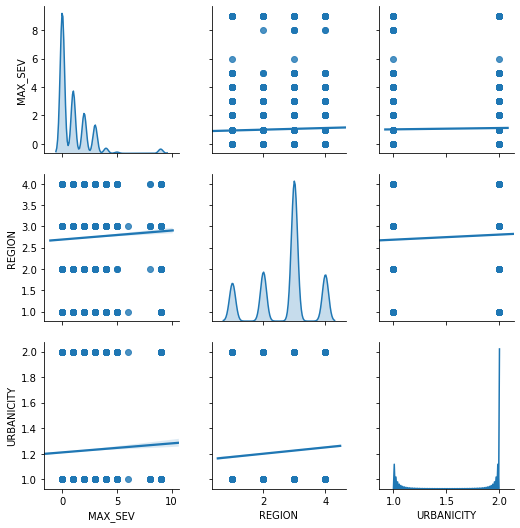

In [20]:
# Review with limited columns
#   *  'REGION', 'URBANICITY', 
#      'VE_TOTAL', 'VE_FORMS', 'PEDS',
#      'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
#      'MONTH', 'DAY_WEEK', 'HOUR',
#      'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
        
train_dataset = X_train.drop(['VE_TOTAL', 'VE_FORMS', 'PEDS',
                              'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
                              'MONTH', 'DAY_WEEK', 'HOUR',
                              'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
                             ],axis=1).copy()
train_dataset.insert(0, "MAX_SEV", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

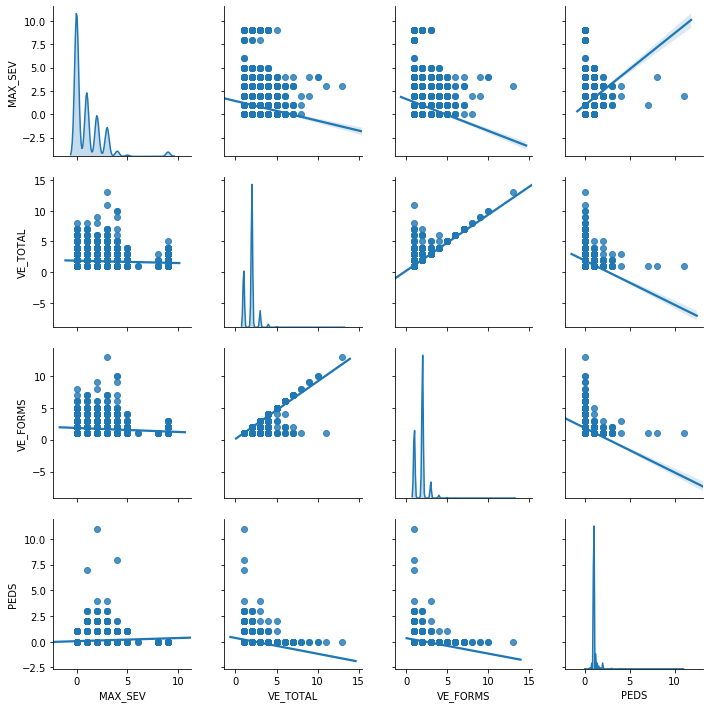

In [21]:
# Review with limited columns
#      'REGION', 'URBANICITY', 
#   *  'VE_TOTAL', 'VE_FORMS', 'PEDS',
#      'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
#      'MONTH', 'DAY_WEEK', 'HOUR',
#      'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
        
train_dataset = X_train.drop(['REGION', 'URBANICITY',
                              'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
                              'MONTH', 'DAY_WEEK', 'HOUR',
                              'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
                             ],axis=1).copy()
train_dataset.insert(0, "MAX_SEV", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

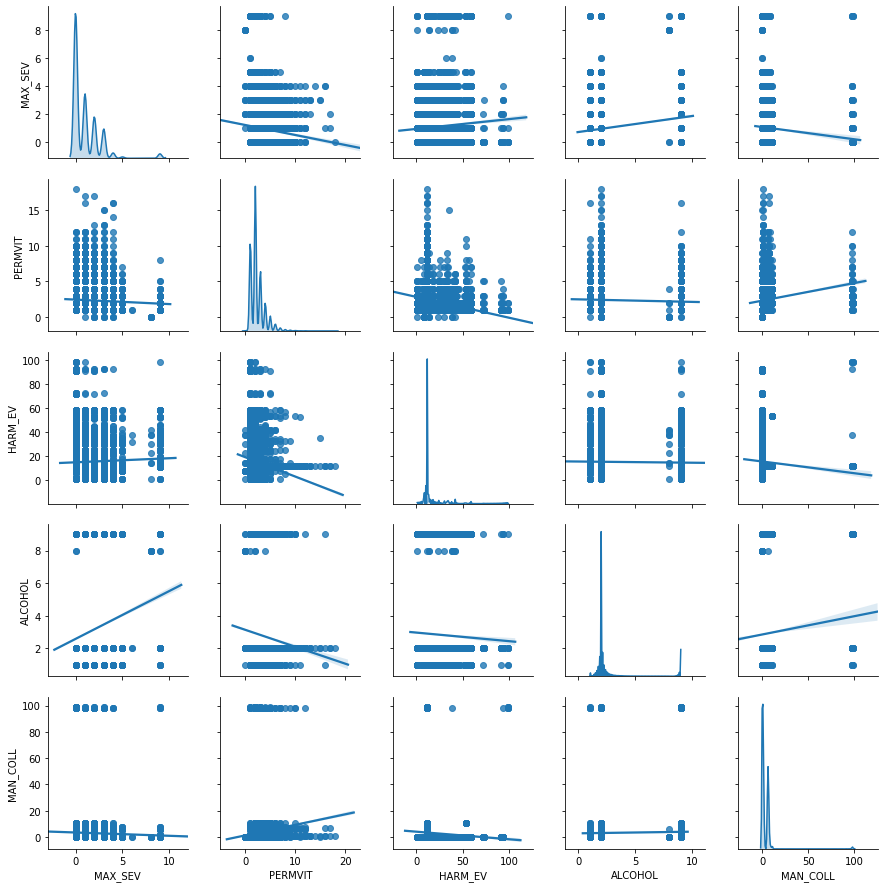

In [16]:
# Review with limited columns
#      'REGION', 'URBANICITY', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
#   *  'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
#      'MONTH', 'DAY_WEEK', 'HOUR',
#      'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
        
train_dataset = X_train.drop(['REGION', 'URBANICITY', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
                              'MONTH', 'DAY_WEEK', 'HOUR',
                              'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
                             ],axis=1).copy()
train_dataset.insert(0, "MAX_SEV", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

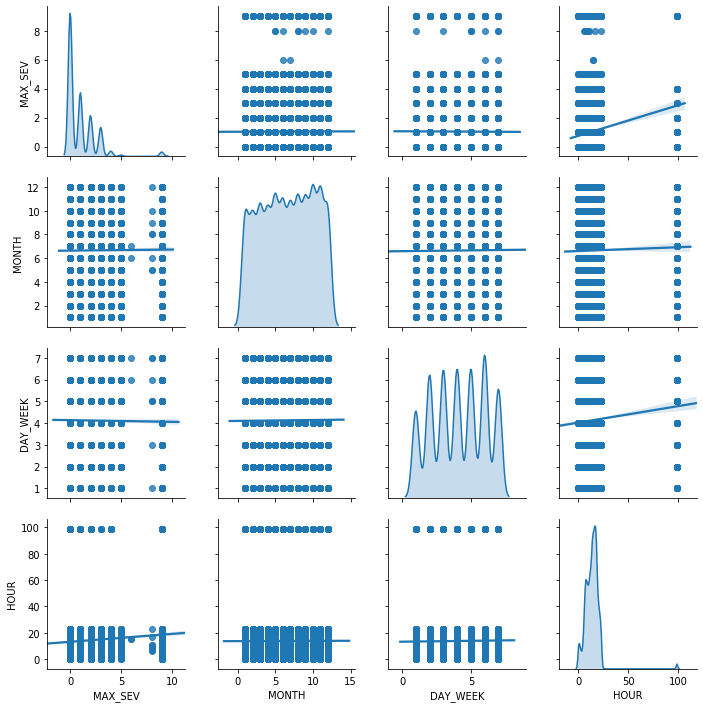

In [18]:
# Review with limited columns
#      'REGION', 'URBANICITY', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
#      'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
#   *  'MONTH', 'DAY_WEEK', 'HOUR',
#      'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
        
train_dataset = X_train.drop(['REGION', 'URBANICITY', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
                              'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
                              'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
                             ],axis=1).copy()
train_dataset.insert(0, "MAX_SEV", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

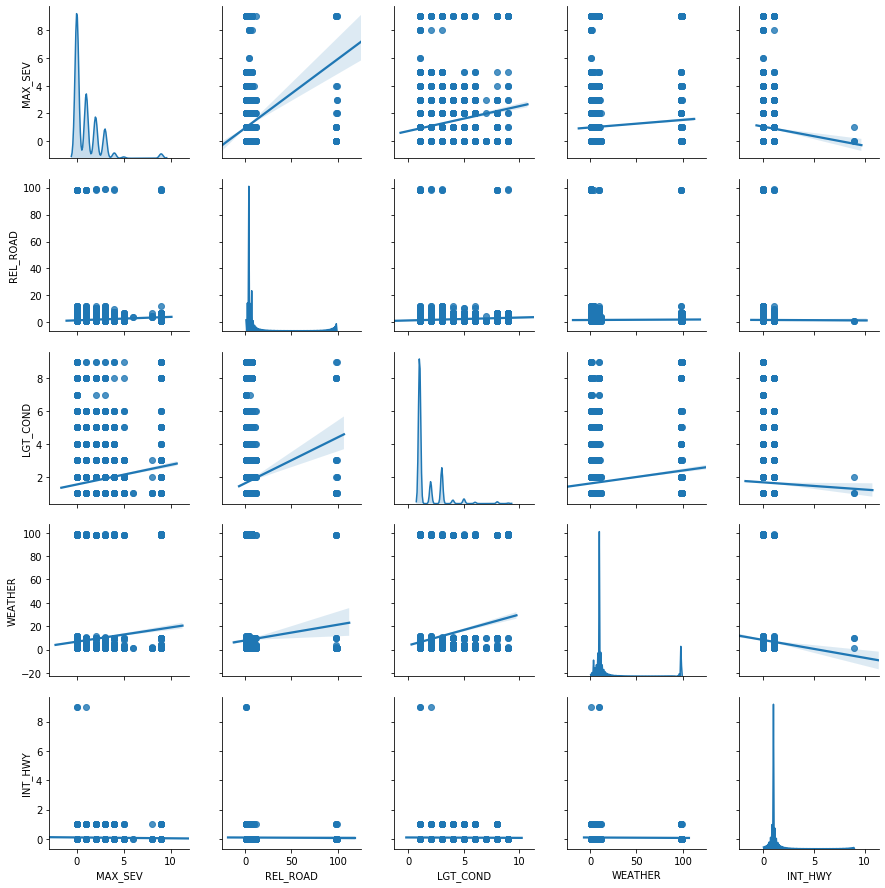

In [19]:
# Review with limited columns
#      'REGION', 'URBANICITY', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
#      'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
#      'MONTH', 'DAY_WEEK', 'HOUR',
#   *  'REL_ROAD', 'LGT_COND', 'WEATHER', 'INT_HWY'
        
train_dataset = X_train.drop(['REGION', 'URBANICITY', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
                              'PERMVIT', 'HARM_EV', 'ALCOHOL','MAN_COLL',
                              'MONTH', 'DAY_WEEK', 'HOUR'
                             ],axis=1).copy()
train_dataset.insert(0, "MAX_SEV", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')